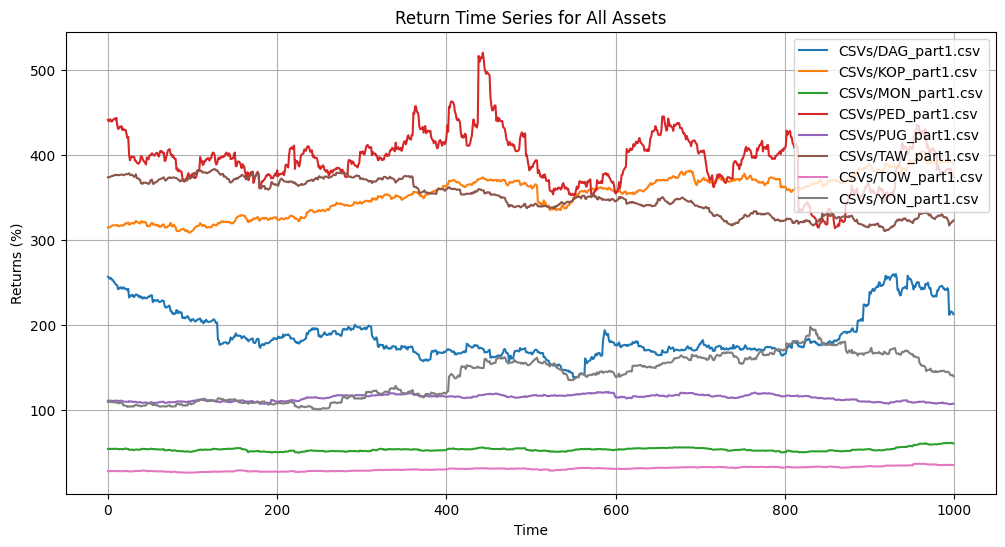

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def main():
    csv_files = ["CSVs/DAG_part1.csv", "CSVs/KOP_part1.csv", "CSVs/MON_part1.csv", "CSVs/PED_part1.csv", "CSVs/PUG_part1.csv", "CSVs/TAW_part1.csv", "CSVs/TOW_part1.csv", "CSVs/YON_part1.csv"]
    if len(csv_files) < 8:
        raise ValueError("At least 8 CSV files are required.")

    DAG_df = pd.read_csv("CSVs/DAG_part1.csv")
    KOP_df = pd.read_csv("CSVs/KOP_part1.csv")
    MON_df = pd.read_csv("CSVs/MON_part1.csv")
    PED_df = pd.read_csv("CSVs/PED_part1.csv")
    PUG_df = pd.read_csv("CSVs/PUG_part1.csv")
    TAW_df = pd.read_csv("CSVs/TAW_part1.csv")
    TOW_df = pd.read_csv("CSVs/TOW_part1.csv")
    YON_df = pd.read_csv("CSVs/YON_part1.csv")
    
    price_series = []
    for file in csv_files[:8]:
        df = pd.read_csv(file)
        price_series.append(df['C'].rename(file))

    prices = pd.concat(price_series, axis=1).sort_index()
    
    # Convert to returns
    returns = prices.pct_change().dropna()

    # Plot all return series
    plt.figure(figsize=(12, 6))
    for column in prices.columns:
        plt.plot(prices.index, prices[column], label=column)
    
    plt.xlabel("Time")
    plt.ylabel("Returns (%)")
    plt.title("Return Time Series for All Assets")
    plt.legend()
    plt.grid(True)
    plt.show()

    portfolio_returns = []
    all_weights = []
    for date, row in returns.iterrows():
        w = weights(row)
        all_weights.append(w)
        port_return = np.dot(w, row.values)
        portfolio_returns.append(port_return)

    portfolio_returns = pd.Series(portfolio_returns, index=returns.index)

    pnl = (1 + portfolio_returns).cumprod()

    sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)

    
    print("Final PnL:", pnl.iloc[-1])
    print("Sharpe Ratio:", sharpe_ratio)

    plt.plot(pnl)
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.title("Portfolio PnL")
    plt.show()

# Convert weights list to numpy array for plotting
    weights_array = np.array(all_weights)

    # Create a stacked area plot of the weights over time
    plt.figure(figsize=(12, 6))
    plt.stackplot(returns.index, weights_array.T, 
                labels=[f'Asset {i+1}' for i in range(weights_array.shape[1])])
    plt.xlabel('Time')
    plt.ylabel('Weight')
    plt.title('Portfolio Weights Over Time')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    








def weights(row):

    def markowitz_optimization(returns_matrix, avg_returns_array, start_idx=-100, end_idx=None):
    # Use data from start_idx to end_idx
    # Negative start_idx counts from the end
    # end_idx=None means use all data up to the end
        window_returns = returns_matrix[start_idx:end_idx]
        window_cov = np.cov(window_returns.T)
        print(window_cov)
        
        # Calculate inverse of covariance matrix
        inv_cov = np.linalg.inv(window_cov)
        
        # Calculate weights using closed form solution
        ones = np.ones(len(avg_returns_array))
        numerator = np.dot(inv_cov, ones)
        denominator = np.dot(ones, numerator)
        
        # Global minimum variance portfolio weights
        weights = numerator / denominator
        
        # Ensure weights sum to 1 and are non-negative
        weights = np.maximum(weights, 0)  # Floor at 0
        weights = weights / np.sum(weights)  # Normalize to sum to 1
        
        return weights

    DAG_df = pd.read_csv("CSVs/DAG_part1.csv")
    KOP_df = pd.read_csv("CSVs/KOP_part1.csv")
    MON_df = pd.read_csv("CSVs/MON_part1.csv")
    PED_df = pd.read_csv("CSVs/PED_part1.csv")
    PUG_df = pd.read_csv("CSVs/PUG_part1.csv")
    TAW_df = pd.read_csv("CSVs/TAW_part1.csv")
    TOW_df = pd.read_csv("CSVs/TOW_part1.csv")
    YON_df = pd.read_csv("CSVs/YON_part1.csv")

    DAG_returns = (DAG_df['C'] - DAG_df['O']) / DAG_df['O'] * 100
    KOP_returns = (KOP_df['C'] - KOP_df['O']) / KOP_df['O'] * 100
    MON_returns = (MON_df['C'] - MON_df['O']) / MON_df['O'] * 100
    PED_returns = (PED_df['C'] - PED_df['O']) / PED_df['O'] * 100
    PUG_returns = (PUG_df['C'] - PUG_df['O']) / PUG_df['O'] * 100
    TAW_returns = (TAW_df['C'] - TAW_df['O']) / TAW_df['O'] * 100
    TOW_returns = (TOW_df['C'] - TOW_df['O']) / TOW_df['O'] * 100
    YON_returns = (YON_df['C'] - YON_df['O']) / YON_df['O'] * 100

    # Calculate average daily returns
    avg_returns = {
        'DAG': DAG_returns.mean(),
        'KOP': KOP_returns.mean(),
        'MON': MON_returns.mean(),
        'PED': PED_returns.mean(),
        'PUG': PUG_returns.mean(),
        'TAW': TAW_returns.mean(),
        'TOW': TOW_returns.mean(),
        'YON': YON_returns.mean()
    }
    # Convert average returns to numpy array
    avg_returns_array = np.array(list(avg_returns.values()))

    # Create returns matrix for covariance calculation
    returns_matrix = np.column_stack([
        DAG_returns,
        KOP_returns, 
        MON_returns,
        PED_returns,
        PUG_returns,
        TAW_returns,
        TOW_returns,
        YON_returns
    ])


    optimal_weights = markowitz_optimization(returns_matrix, avg_returns_array, -30, -5)
    # print("\nOptimal Weights:")
    print(optimal_weights[7])



    return np.array(optimal_weights)



main()
